# Table of Contents

  
- Table of Contents

- First look at the dataset

- EDA

   - Checking for Missing Values
   
   - Basic Statistical Details
  
   - Correlation Heatmap
      - Highly correlated pairs
      - Inverse correlated pairs
      - Low correlated pairs
      
           
       
- Data Visualization

    - Feature Pairs
    - Scatter Plot
    - Count Plot
    - Histogram 
    - Joint Plot
    
    
    
- Pre-Modeling Tasks

   - Separating the independant and the dependant variable
   - Splitting the dataset 
   - Feature Scaling
   
   
   
- Modeling

   - Logistic Regression
   - Gradient Boosting Classifier
   - Random Forest Classifier
   - Decision Tree Classifier
   - KNeighbors Classifier
   - XGB Classifier
   - Suport Vector Machine
   
   
- Evaluation and comparision of all the models

  - Classification Accuracy

  - Confusion matrix

  - Precision

  - Recall

  - classification_report

  - ROC AUC Score

  - Area under curve (AUC)
   
    

# Loading the libraries and the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Pre-Modeling Tasks

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Modeling

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC


# Evaluation and comparision of all the models


from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, confusion_matrix, precision_recall_fscore_support
from sklearn.metrics import roc_auc_score,auc,f1_score
from sklearn.metrics import precision_recall_curve,roc_curve


#ignore warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("breast_cancer_data.csv")

In [3]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


****Check the target variable:****

- Malignant = 1 (indicates prescence of cancer cells)

- Benign = 0 (indicates abscence)

****What is the difference between Malignant and Benign ?****

![Differences Between a Malignant and Benign Tumor](https://gotalktogetherdotcom.files.wordpress.com/2016/05/cancerbenignmalig1.jpg?w=550)

Loving Biology - WordPress.com

How many Benign and Malignant do we have in our dataset?

In [4]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

As we can see, we have 212 - Malignant, and 357 - Benign

In [5]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [7]:
df.shape

(569, 32)

# Exploratory Data Analysis

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## Basic Statistical Details

In [9]:
# describing the dataset

df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave_points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


## Checking for missing values

Machine Learning algorithm generally, cannot work with missing values, so before we launch a machine learning algorithm we must clean the dataset, plus we will also remove the features that doesn't affect the model. 

In [10]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [11]:
# Deleting the id column as it is not required for our analysis

df.drop(['id'],axis=1,inplace=True)

In [12]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Checking for the correlation

In [13]:
# The diagnosis feature is temporarily removed as it contains incompatible strings that hinder correlation calculations.
df1= df.drop(['diagnosis'],axis=1)

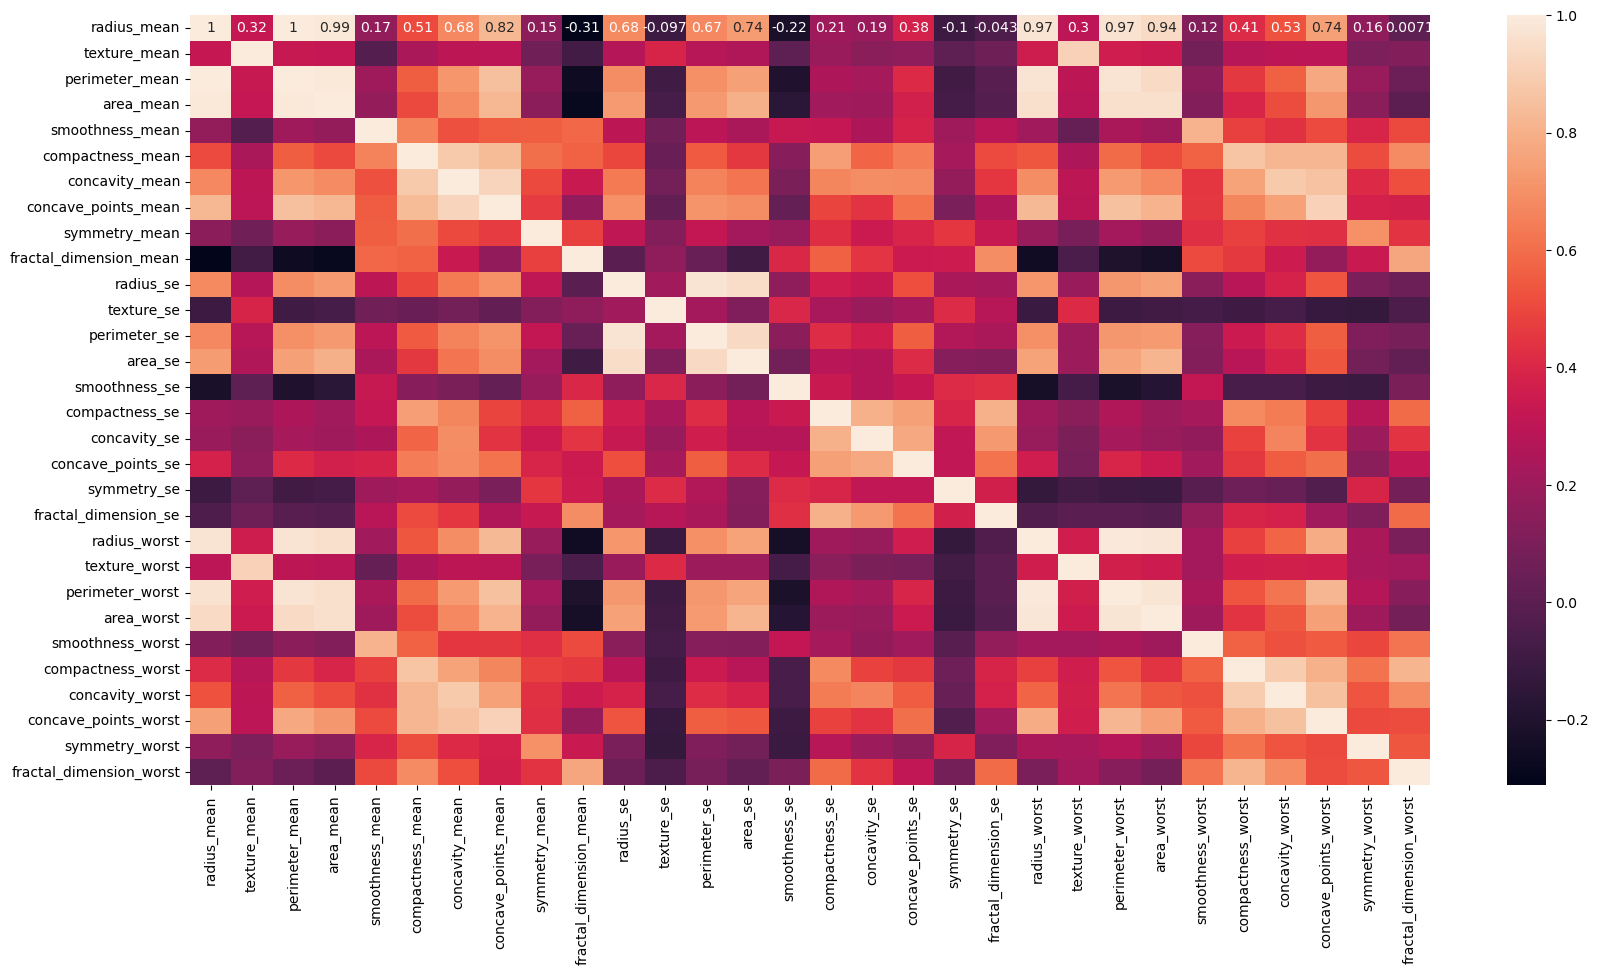

In [14]:
plt.figure(figsize=(20,10))
sns.heatmap(df1.corr(),annot=True)
plt.ioff()

### Highly correlated pairs

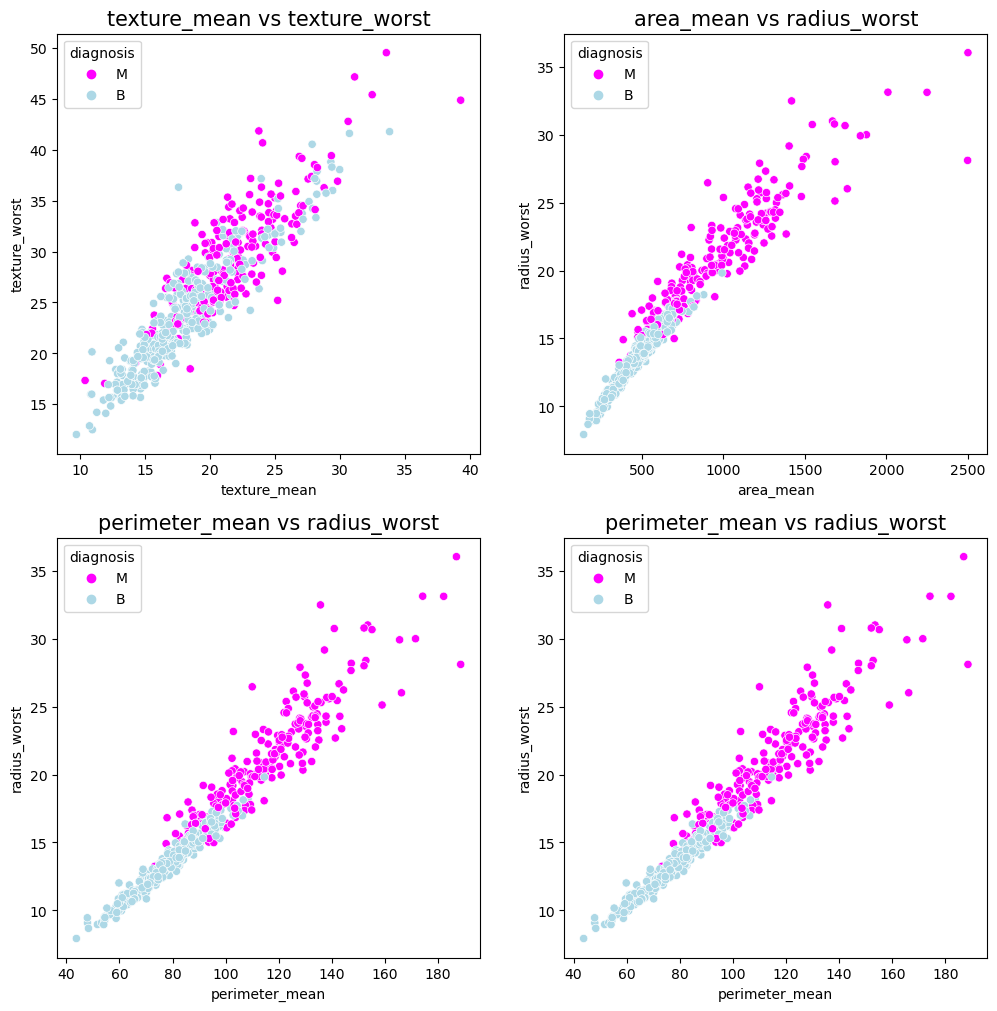

In [15]:

palette ={'B' : 'lightblue', 'M' : 'magenta'}


fig = plt.figure(figsize=(12,12))
def plot_scatter(a,b,k):
    plt.subplot(k)
    sns.scatterplot(x = df[a], y = df[b], hue = "diagnosis",
                    data = df, palette = palette)
    plt.title(a + ' vs ' + b,fontsize=15)
    
plot_scatter('texture_mean','texture_worst',221) 
plot_scatter('area_mean','radius_worst',222) 
plot_scatter('perimeter_mean','radius_worst',223)  
plot_scatter('perimeter_mean','radius_worst',224) 
plt.show()

### Inverse correlated pairs

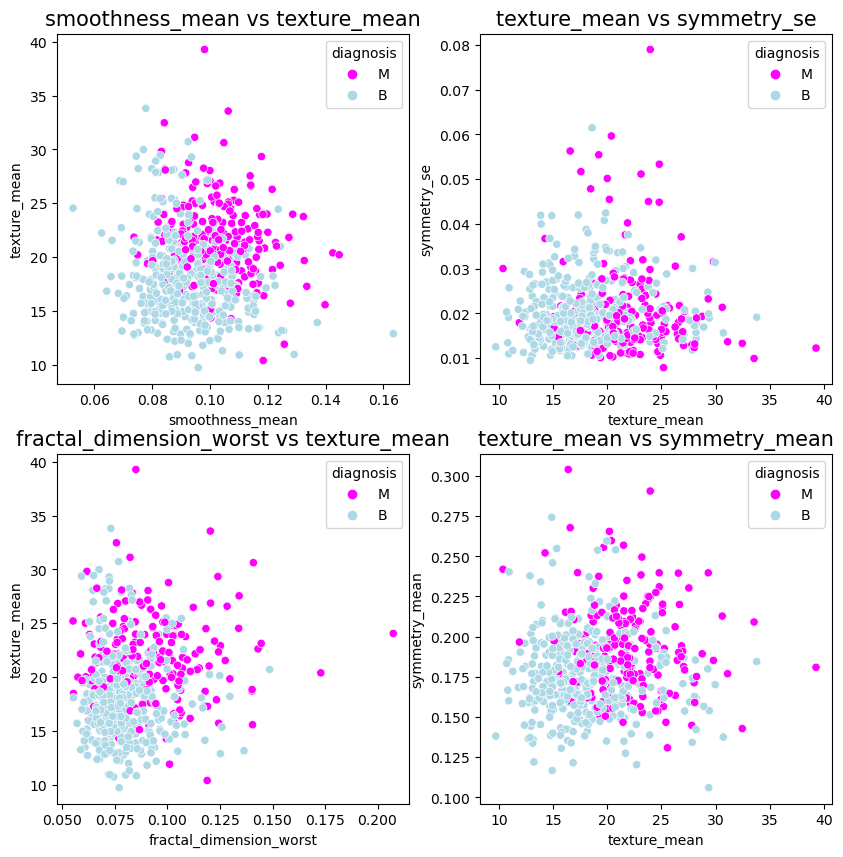

In [16]:
fig = plt.figure(figsize=(10,10))

  
plot_scatter('smoothness_mean','texture_mean',221) 
plot_scatter('texture_mean','symmetry_se',222) 
plot_scatter('fractal_dimension_worst','texture_mean',223) 
plot_scatter('texture_mean','symmetry_mean',224)

plt.show()

### Low correlated pairs

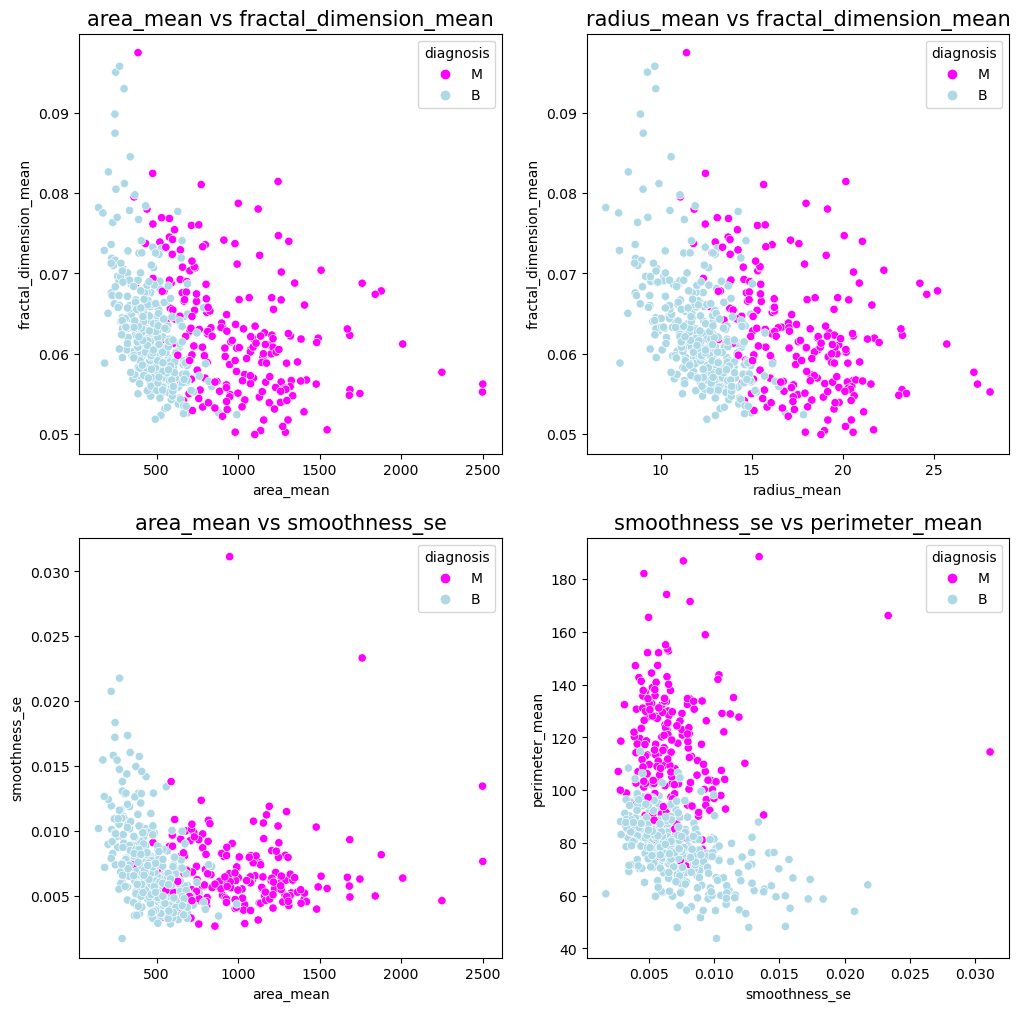

In [17]:
fig = plt.figure(figsize=(12,12))
plot_scatter('area_mean','fractal_dimension_mean',221)
plot_scatter('radius_mean','fractal_dimension_mean',222)
plot_scatter('area_mean','smoothness_se',223)
plot_scatter('smoothness_se','perimeter_mean',224)
plt.show()

# Data Visualization

## PairPlot

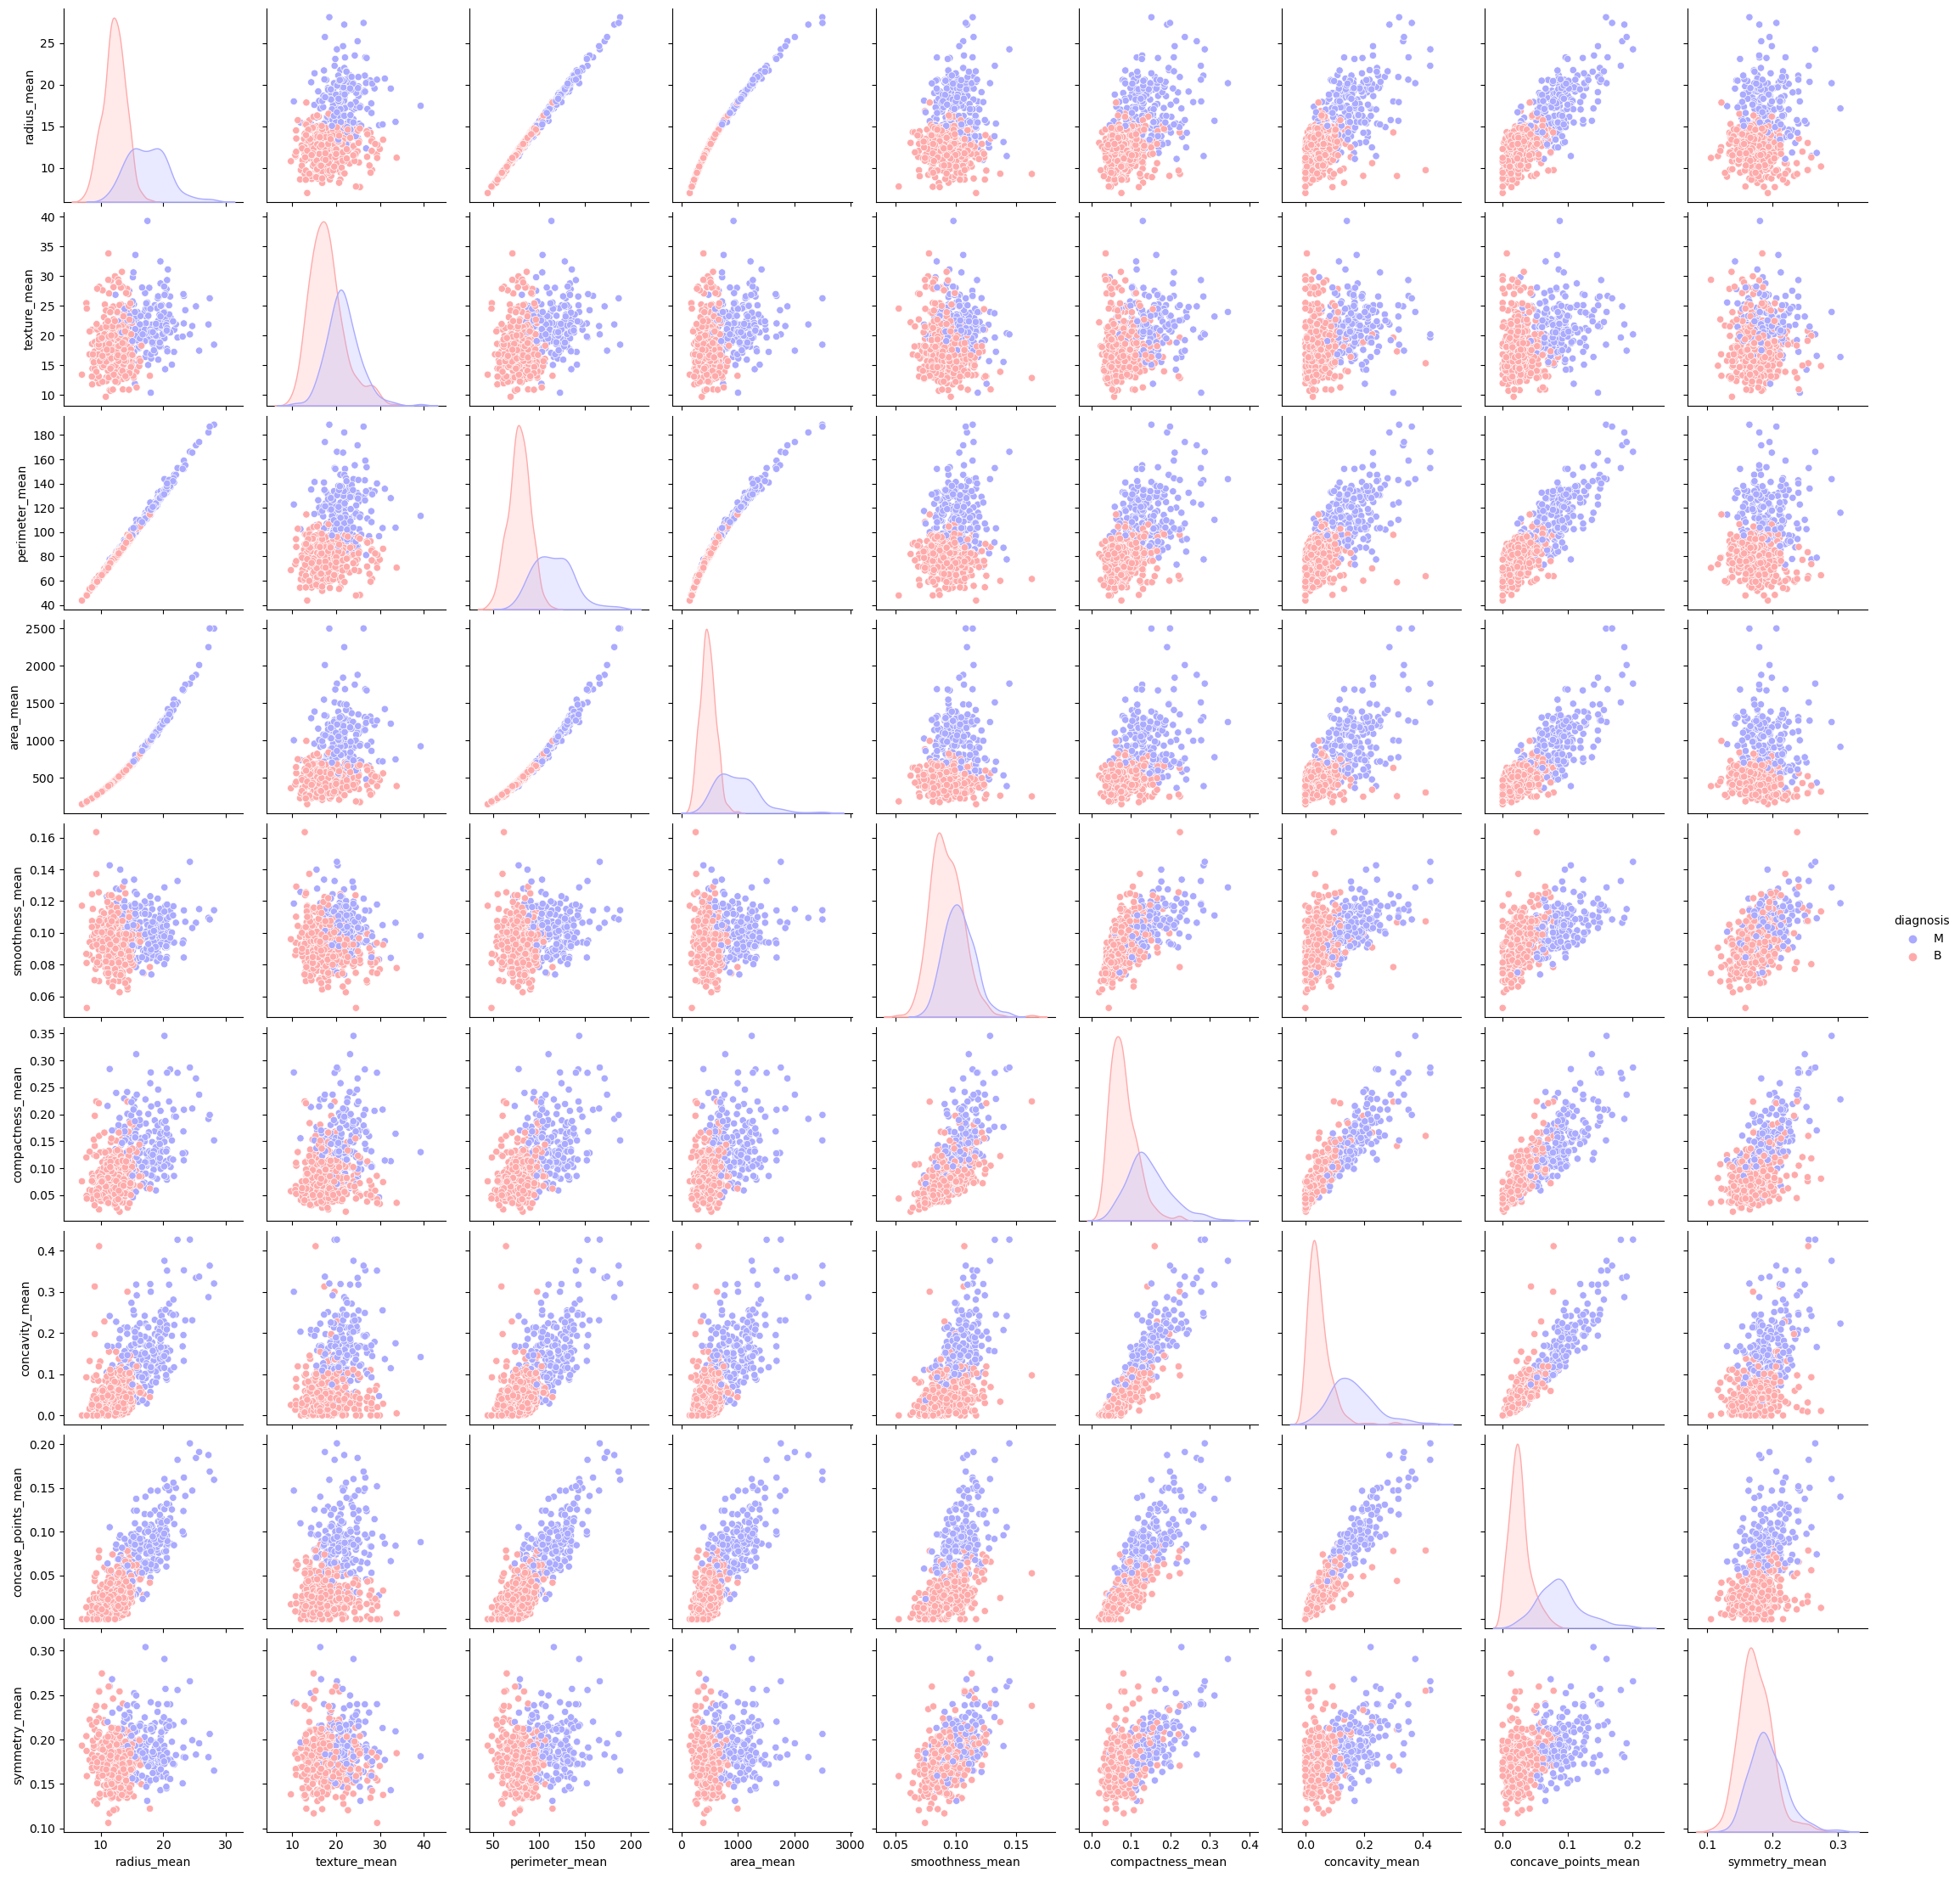

In [18]:
from pylab import rcParams

rcParams['figure.figsize'] = 8,5

cols = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean','diagnosis']

sns_plot = sns.pairplot(data=df[cols],hue='diagnosis', palette='bwr')
plt.show()

## ScatterPlot

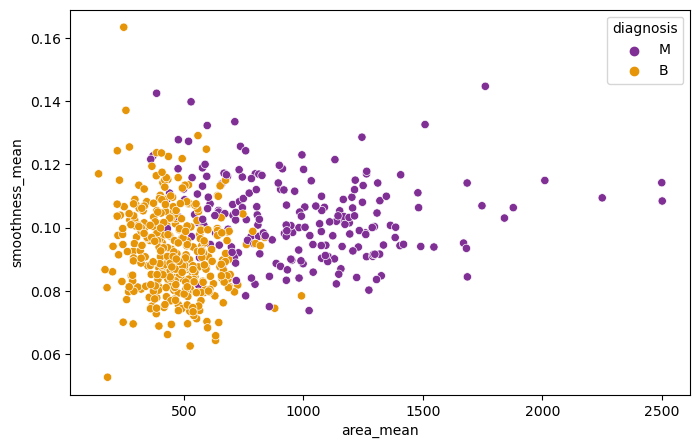

In [19]:
# area_mean vs smoothness_mean

sns.scatterplot(x= 'area_mean', y= 'smoothness_mean', hue= 'diagnosis', data=df, palette='CMRmap')
plt.show()

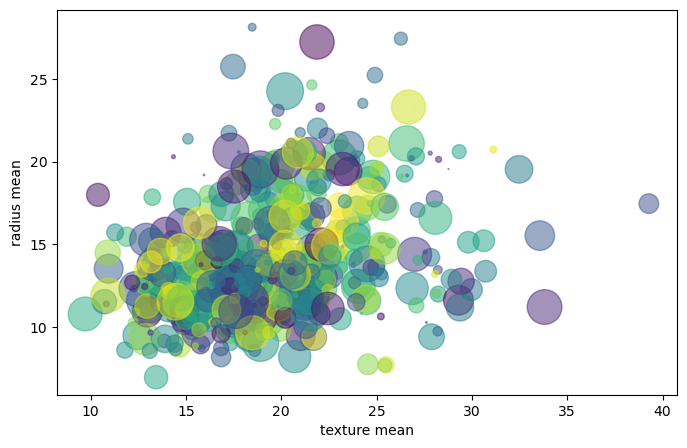

In [20]:
# texture mean vs radius_mean

size = len(df['texture_mean'])

area = np.pi * (15 * np.random.rand( size ))**2
colors = np.random.rand( size )

plt.xlabel("texture mean")
plt.ylabel("radius mean") 
plt.scatter(df['texture_mean'], df['radius_mean'], s=area, c= colors, alpha=0.5)
plt.show()

## Count Plot

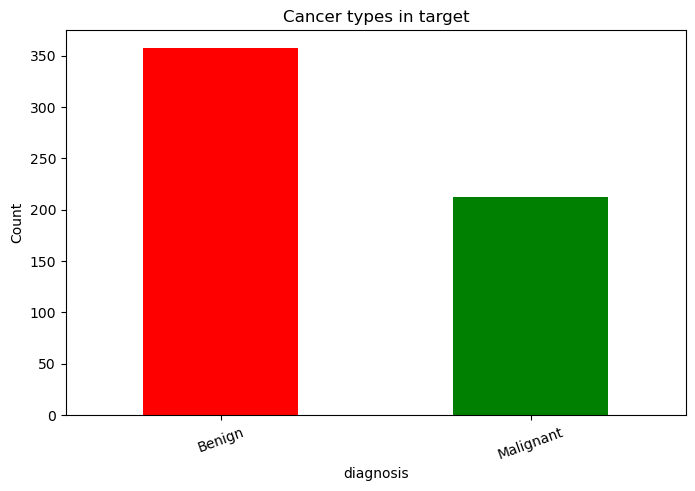

In [21]:
#plotting bar chart.
fig = df.diagnosis.value_counts().plot(kind = 'bar', color=["Red", 'green'])
fig.set_xticklabels(labels=['Benign', "Malignant"], rotation=20)
plt.title("Cancer types in target")
plt.ylabel("Count")
plt.show()

In [22]:
df.diagnosis.value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

## Histogram

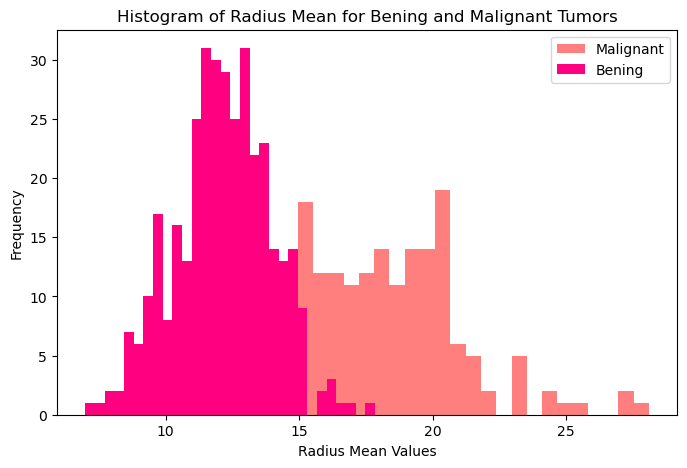

In [23]:
m = plt.hist(df[df["diagnosis"] == "M"].radius_mean,bins=30,fc = (1,0,0,0.5),label = "Malignant")
b = plt.hist(df[df["diagnosis"] == "B"].radius_mean,bins=30, fc = (1,0,0.5), label= "Bening")

plt.legend()
plt.xlabel ("Radius Mean Values")
plt.ylabel ("Frequency")
plt.title("Histogram of Radius Mean for Bening and Malignant Tumors")
plt.show()

## JointPlot

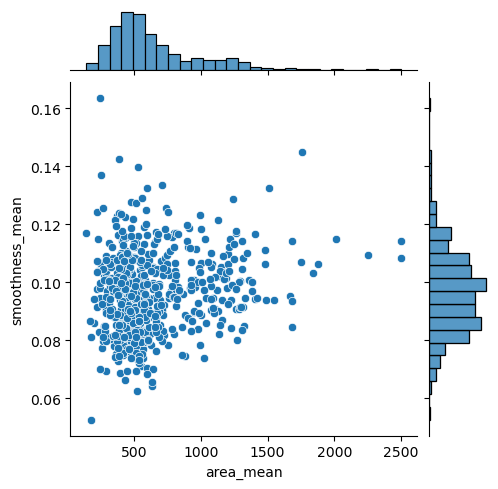

In [24]:
sns.jointplot(data= df, x='area_mean', y='smoothness_mean', height=5)
plt.show()

# Encoding categorical data

As we know machine learning algorithms can only read numerical values. It is essential to encoding categorical features into numerical values.

In [25]:
# Label Encoder

LEncoder = LabelEncoder()

df['diagnosis'] = LEncoder.fit_transform(df['diagnosis'])

So we have encoded malignan as 1 and benign as 0

# Pre-Modeling Tasks

## Separating the independent and the dependent variable

In [26]:
X = df.drop('diagnosis',axis=1).values
y = df['diagnosis'].values

## Splitting the dataset

split the dataset into training and testing data:

In [27]:
random_state = 42

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=random_state)

# Feature Scaling

std scaler

In [28]:
sc = StandardScaler()

X_train = sc.fit_transform(x_train)
X_test= sc.transform(x_test)

# Modeling

- In this part we'll try differents models of Machine learning: Logistic Regression, Gradient Boosting Classifier,Random Forest,XGB Classifier,


  Support Vector Machine, Decision  tree and KNeighbors Model

In [29]:
# Logistic Regression


logreg= LogisticRegression()

logreg.fit(X_train, y_train)

y_pred_logreg = logreg.predict(X_test)


# Gradient Boosting Classifier


GB = GradientBoostingClassifier()

GB.fit(X_train, y_train)

y_pred_GB = GB.predict(X_test)



# Random Forest Classifier

rf = RandomForestClassifier()

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)


# Decision Tree Classifier

dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)


# KNeighbors Classifier


knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)


# XGB Classifier

XGB = XGBClassifier() 

XGB.fit(X_train, y_train)

y_pred_XGB = XGB.predict(X_test)



# Support Vector classifier

svc = SVC(probability=True)

svc.fit(X_train,y_train)

y_pred_svc = svc.predict(X_test)


In [30]:
X_train.shape, y_train.shape,X_test.shape, y_test.shape

((455, 30), (455,), (114, 30), (114,))

# Evaluation and comparison of all the models

In [31]:
models = []

Z = [SVC() , DecisionTreeClassifier() , LogisticRegression() , KNeighborsClassifier() ,XGBClassifier(),
    RandomForestClassifier() , GradientBoostingClassifier()]


X = ["SVC" , "DecisionTreeClassifier" , "LogisticRegression" , "KNeighborsClassifier" ,
    "RandomForestClassifier" , "GradientBoostingClassifier", "XGB"]

for i in range(0,len(Z)):
    model = Z[i]
    model.fit( X_train , y_train )
    pred = model.predict(X_test)
    models.append(accuracy_score(pred , y_test))   

In [32]:
d = { "Accuracy" : models , "Algorithm" : X }
data_frame = pd.DataFrame(d)
data_frame

,Accuracy,Algorithm
0,0.982456,SVC
1,0.947368,DecisionTreeClassifier
2,0.973684,LogisticRegression
3,0.947368,KNeighborsClassifier
4,0.956140,RandomForestClassifier
5,0.964912,GradientBoostingClassifier
6,0.956140,XGB


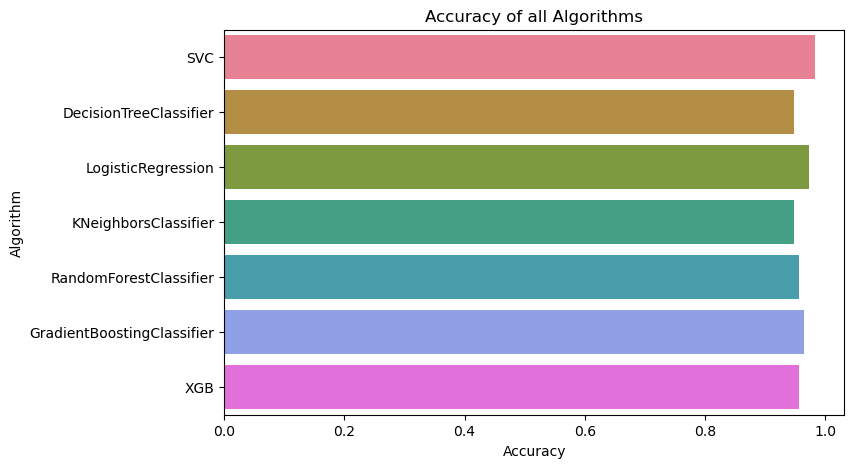

In [33]:
sns.barplot(x=data_frame['Accuracy'], y=data_frame['Algorithm'], palette="husl")
plt.title('Accuracy of all Algorithms')
plt.show()

As we see, from the above table and graph, that SVC classifier works best for this dataset

# Evaluating The Performance of the model

Evaluating the machine learning model is a crucial part in any data science project. There are many metrics that helps us to evaluate our model accuracy.

- Classification Accuracy

- Confusion matrix

- Precision

- Recall

- classification_report

- ROC AUC Score

- Area under curve (AUC)

Now, let's see the performance metrics of svc classifier

## Confusion Matrix

Let’s visualize the confusion matrix, to see how accurate are the results we obtained.

In [34]:
cm = np.array(confusion_matrix(y_test, y_pred_svc, labels=[1,0]))

confusion_mat= pd.DataFrame(cm, index = ['cancer', 'healthy'],
                           columns =['predicted_cancer','predicted_healthy'])

confusion_mat

,predicted_cancer,predicted_healthy
cancer,41,2
healthy,0,71


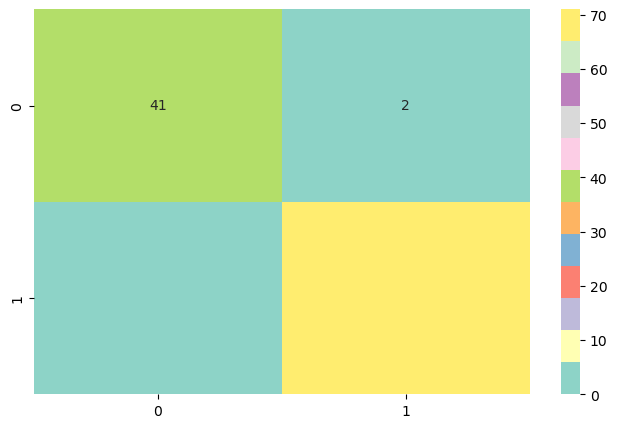

In [35]:
sns.heatmap(cm,annot=True,fmt='g',cmap='Set3')
plt.show()

- As we can see from the table above:

   - **True Positive(TP)** : Values that the model predicted as yes(Healthy), and is actually yes(Healthy).
   - **True Negative(TN)** : Values that the model predicted as not(Cancer), and is actually no(Cancer).
   - **False Positive(FP)**: Values that the model predicted as yes(Healthy), but actually no(Cancer).
   - **False Negative(FN)**: Values that the model predicted as no (Cancer), but actually yes(Healthy).


For this dataset, whenever the model is predicting something as yes, it indicates Absence of cancer cells (Healthy) and for cases when the model predicting no; it indicates existence of cancer cells(Cancer).

## Accuracy_Score

- **Accuracy_Score** is the most intuitive performance measure and it is simply a ratio of correctly predicted observation to the total observations


(TP + TN)/total = 0.98245614

In [36]:
print(accuracy_score(y_test, y_pred_svc))

0.9824561403508771


## Precision 

- **Precision** is the ratio of correctly predicted positive observations to the total predicted positive observations.

In [37]:
print(precision_score(y_test, y_pred_svc))

1.0


## Recall

- **Recall** also called Sensitivity, is the ratio of positive instances that are correctly detected by the classifier to the all observations in actual class

In [38]:
print(recall_score(y_test, y_pred_svc))

0.9534883720930233


## Classification Report


In [39]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



- True Positive(TP) : 71
    
- True Negative(TN) : 41
    
- False Positive(FP): 2
    
- False Negative(FN): 0


**True Positive Rate/Recall/Sensitivity: How often the model predicts yes(Healthy) when it's actually yes(Healthy)?**

- **True Positive Rate(TPR)** = TP/TP+FP = 71/(871+2) = 0.97


**False Positive Rate: How often the model predicts yes(Healthy) when it's actually no(Cancer)?**

- **False Positive Rate(FPR)** = FP/FP+TN = 2/2+41 = 0.04

## The ROC Curve

0.99737962659679


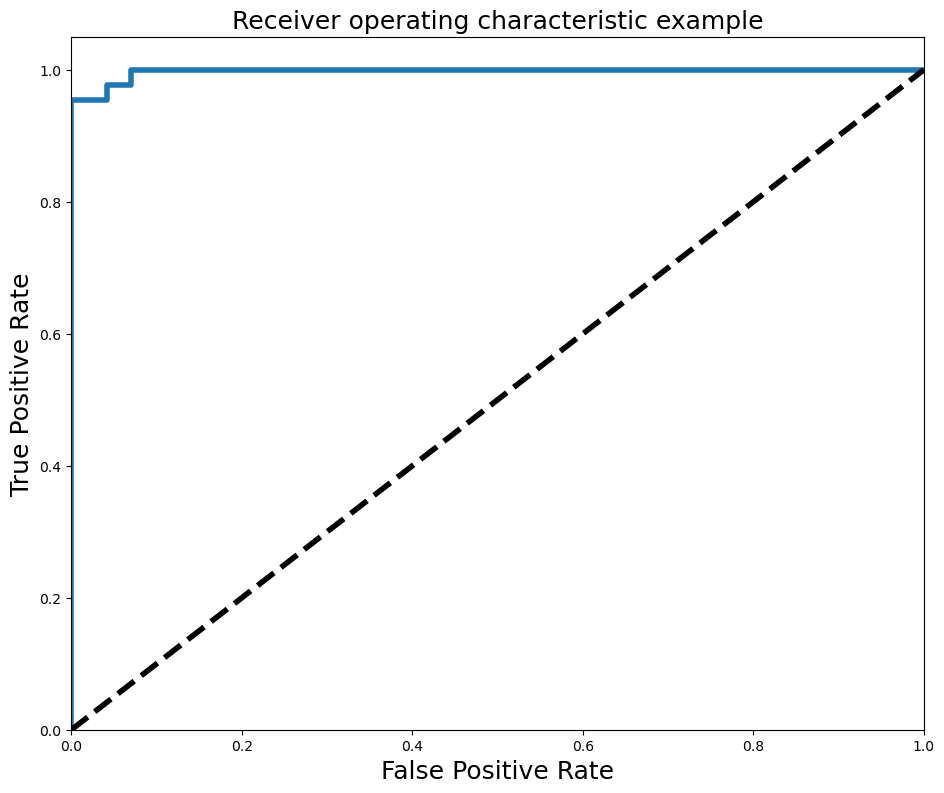

In [40]:

#plt.style.use('seaborn-pastel')

y_score = svc.decision_function(X_test)

FPR, TPR, _ = roc_curve(y_test, y_score)
ROC_AUC = auc(FPR, TPR)
print (ROC_AUC)

plt.figure(figsize =[11,9])
plt.plot(FPR, TPR, label= 'ROC curve(area = %0.2f)'%ROC_AUC, linewidth= 4)
plt.plot([0,1],[0,1], 'k--', linewidth = 4)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate', fontsize = 18)
plt.ylabel('True Positive Rate', fontsize = 18)
plt.title('Receiver operating characteristic example', fontsize= 18)
plt.show()

- The ROC curve shows the trade-off between sensitivity (or TPR) and specificity (1 – FPR). As we notice the **svc** Classifier give a curve closer

  to the top-left corner so it indicate a better performance. 

## Area Under Curve

Area Under Curve is a common way to compare classifiers. A perfect classifier will have ROC AUC equal to 1

Sckit-Learn provides a function to compute the ROC AUC.

In [41]:
roc_auc_score(y_test, y_score)

0.99737962659679